In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/player_stats_men.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'S.NO', 'PLAYER NAME', 'JERSEY NO.', 'CLUB', 'Position',
       'Height', 'Weight', 'NO. OF GAME PLAYED', 'TOTAL SCORE',
       'AVR. SCORE PER GAME', 'FOULS', 'TECHNICAL', 'BLOCK', 'TOTAL ASSIST',
       'AVR. ASSIST PER GAME', 'TOTAL REBOUND', 'AVR. REBOUND PER GAME',
       'STEAL', 'TOTAL TURN OVER', 'AVR. TURNOVER PER GAME',
       '3 POINTS ATTEMPT', '3 POINTS MADE', '3 PA %', '2 POINT ATTEMPT',
       '2 POINT MADE', '2 PA %', 'FIELD GOALS ATTEMPT', 'FIELD GOALS MADE',
       'FIELD GOAL %', 'FREE THROW ATTEMPT', 'FREE THROW MADE',
       'FREE THROW ACCURACY %', 'EFFICIENCY', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

In [4]:
df['3 PA %'].replace({'#DIV/0!': 0}, inplace=True)

In [5]:
df['FIELD GOAL %'].replace({'#DIV/0!': 0}, inplace=True)

In [6]:
df['2 PA %'].replace({'#DIV/0!': 0}, inplace=True)

In [7]:
df['FREE THROW ACCURACY %'].replace({'#DIV/0!': 0}, inplace=True)

In [8]:
df['3 PA %'].head()

0    36.66666667
1              0
2    33.33333333
3    30.50847458
4            100
Name: 3 PA %, dtype: object

In [9]:
percentage_stats = df['3 PA %'].astype(float).describe()

In [10]:
attempts_stats = df['3 POINTS ATTEMPT'].describe()

In [11]:
attempts_stats['mean']

17.513513513513512

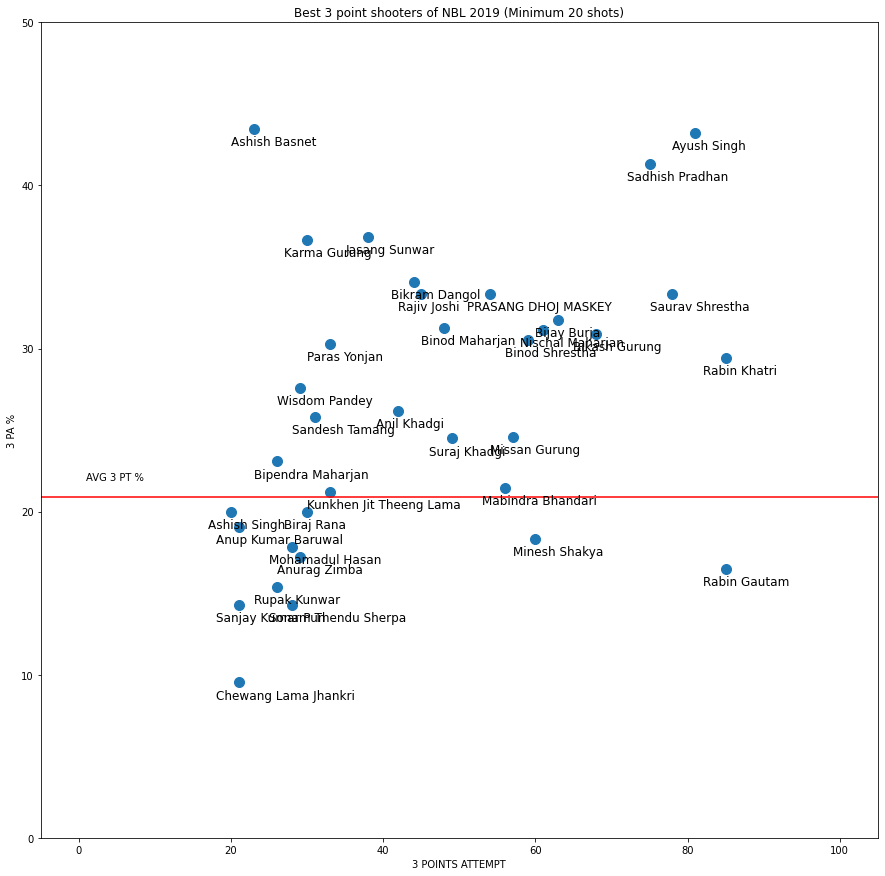

In [12]:
three_pt_shooting = pd.concat([df['3 PA %'].astype(float), df['3 POINTS ATTEMPT'], df['PLAYER NAME']], axis=1)
three_pt_shooting = three_pt_shooting.loc[three_pt_shooting['3 POINTS ATTEMPT'] > 19]
ax = three_pt_shooting.plot.scatter(x='3 POINTS ATTEMPT', y='3 PA %', ylim=(0,50), figsize=(15, 15), s=100)

for i, point in three_pt_shooting.iterrows():
        ax.text(point['3 POINTS ATTEMPT'] - 3, point['3 PA %'] - 1, str(point['PLAYER NAME']), fontsize=12)


ax.axline((0, percentage_stats['mean']), (100, percentage_stats['mean']), c='r')
ax.text(1, percentage_stats['mean'] + 1, 'AVG 3 PT %')
ax.set_title('Best 3 point shooters of NBL 2019 (Minimum 20 shots)')

fig = ax.get_figure()

fig.savefig("../images/3 point shooting.jpg")

In [13]:
df.sort_values(ascending=False, by=['TOTAL ASSIST'])['TOTAL ASSIST'].head(20)

19    63
47    61
10    54
63    44
34    43
44    41
22    34
92    33
32    31
33    30
2     29
66    28
18    28
21    27
91    26
3     25
48    24
73    24
97    20
23    19
Name: TOTAL ASSIST, dtype: int64

In [14]:
df.sort_values(ascending=False, by=['TOTAL TURN OVER'])['TOTAL TURN OVER'].head(20)

66    49
91    43
44    42
73    40
38    36
76    36
97    33
92    32
86    32
37    30
70    29
63    28
31    28
47    27
19    27
45    27
48    26
34    26
10    26
11    26
Name: TOTAL TURN OVER, dtype: int64

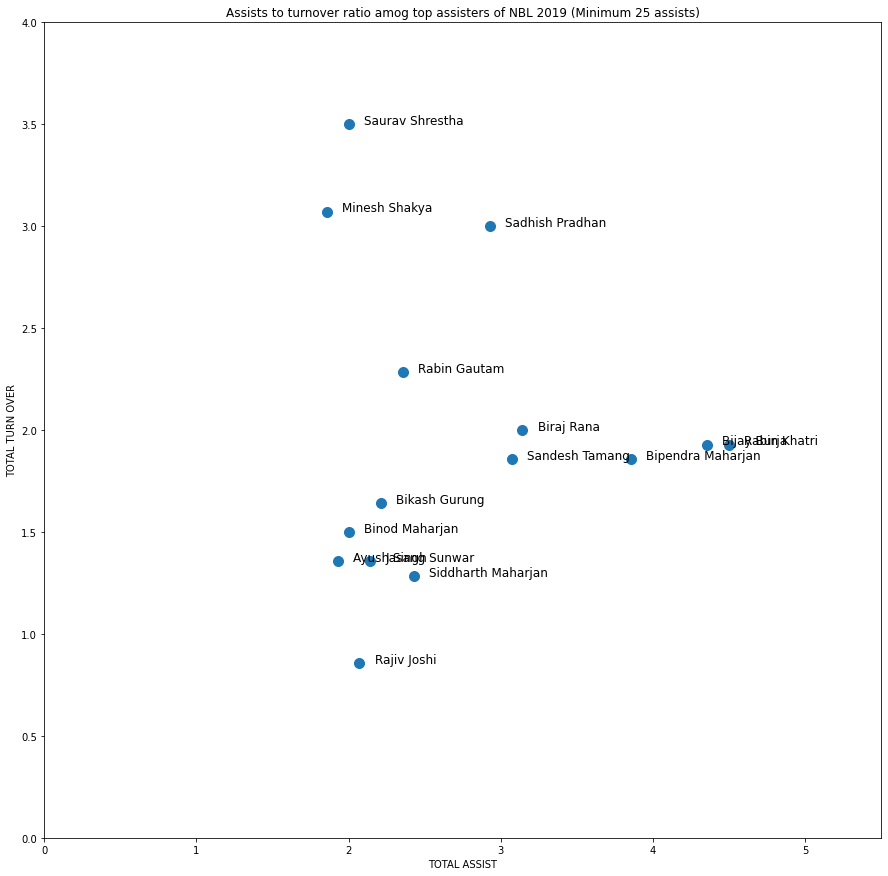

In [40]:
assists_to_turnovers = pd.concat([df['TOTAL ASSIST'].astype(float), df['TOTAL TURN OVER'], df['PLAYER NAME']], axis=1)
assists_to_turnovers = assists_to_turnovers.loc[assists_to_turnovers['TOTAL ASSIST'] > 25]
assists_to_turnovers['TOTAL ASSIST'] = df['TOTAL ASSIST'].astype(float) / 14
assists_to_turnovers['TOTAL TURN OVER'] = df['TOTAL TURN OVER'].astype(float) / 14

ax = assists_to_turnovers.plot.scatter(x='TOTAL ASSIST', y='TOTAL TURN OVER', ylim=(0,4), xlim=(0, 5.5), figsize=(15, 15), s=100)

for i, point in assists_to_turnovers.iterrows():
        ax.text(point['TOTAL ASSIST'] + 0.1, point['TOTAL TURN OVER'], str(point['PLAYER NAME']), fontsize=12)


ax.set_title('Assists to turnover ratio amog top assisters of NBL 2019 (Minimum 25 assists)')

fig = ax.get_figure()

fig.savefig("../images/Assists to turnovers.jpg")

In [16]:
df.sort_values(ascending=False, by=['FIELD GOALS ATTEMPT'])['FIELD GOALS MADE'].head(20)

66    112
44    103
19     95
32     83
91     60
92     51
47     66
21     83
76     53
73     56
48     54
63     40
27     53
23     43
3      49
31     65
25     75
7      65
6      50
18     42
Name: FIELD GOALS MADE, dtype: int64

In [17]:
df['FIELD GOALS ATTEMPT'].describe()

count    111.000000
mean      59.648649
std       55.936758
min        0.000000
25%       11.000000
50%       46.000000
75%       87.000000
max      260.000000
Name: FIELD GOALS ATTEMPT, dtype: float64

In [18]:
field_goal_stats = df['FIELD GOAL %'].astype(float).describe()

In [19]:
df['FIELD GOAL %'].astype(float).describe()

count    111.000000
mean      40.029234
std       22.091427
min        0.000000
25%       29.679471
50%       40.000000
75%       49.705882
max      150.000000
Name: FIELD GOAL %, dtype: float64

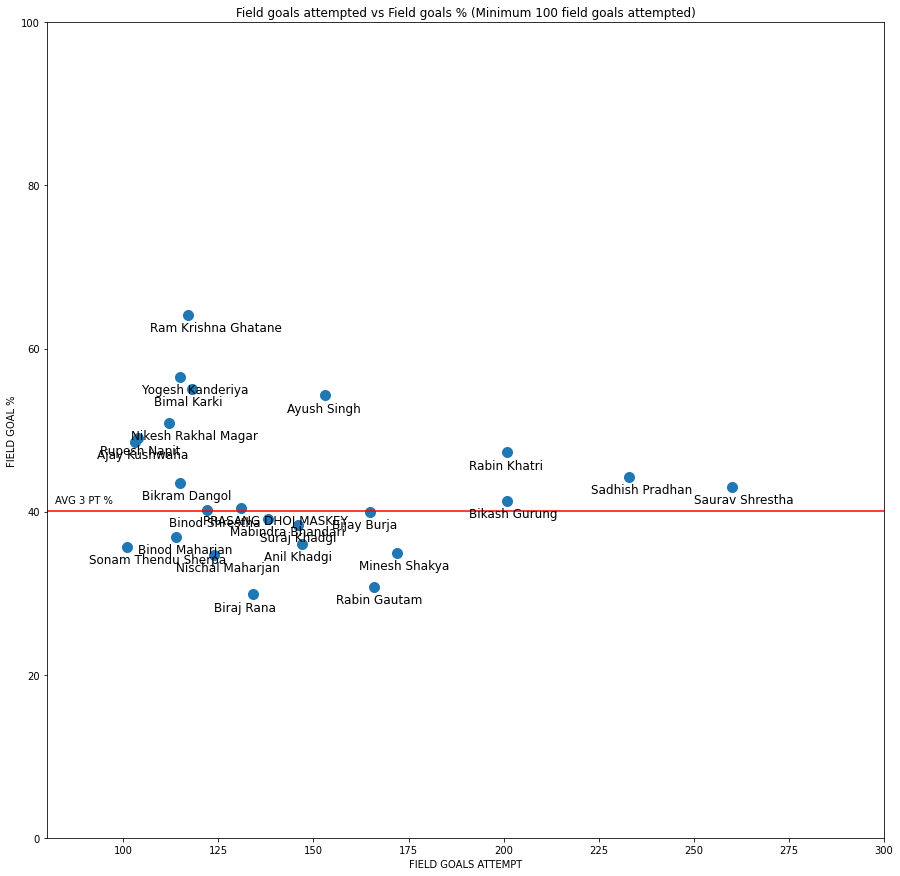

In [20]:
field_goals = pd.concat([df['FIELD GOALS ATTEMPT'], df['FIELD GOAL %'].astype(float), df['PLAYER NAME']], axis=1)
field_goals = field_goals.loc[field_goals['FIELD GOALS ATTEMPT'] > 100]
ax = field_goals.plot.scatter(x='FIELD GOALS ATTEMPT', y='FIELD GOAL %', ylim=(0,100), xlim=(80, 300), figsize=(15, 15), s=100)

for i, point in field_goals.iterrows():
        ax.text(point['FIELD GOALS ATTEMPT'] - 10, point['FIELD GOAL %'] - 2, str(point['PLAYER NAME']), fontsize=12)


ax.axline((0, field_goal_stats['mean']), (100, field_goal_stats['mean']), c='r')
ax.text(82, field_goal_stats['mean'] + 1, 'AVG 3 PT %')
ax.set_title('Field goals attempted vs Field goals % (Minimum 100 field goals attempted)')

fig = ax.get_figure()

fig.savefig("../images/Field goals.jpg")

In [21]:
ft_stats = df['FREE THROW ACCURACY %'].astype(float).describe()

ft_stats

count    111.000000
mean      53.224176
std       44.890859
min        0.000000
25%       33.333333
50%       53.846154
75%       72.222222
max      400.000000
Name: FREE THROW ACCURACY %, dtype: float64

In [22]:
df['FREE THROW ATTEMPT'].describe()

count    111.000000
mean      14.981982
std       15.773961
min        0.000000
25%        3.000000
50%       10.000000
75%       22.500000
max       60.000000
Name: FREE THROW ATTEMPT, dtype: float64

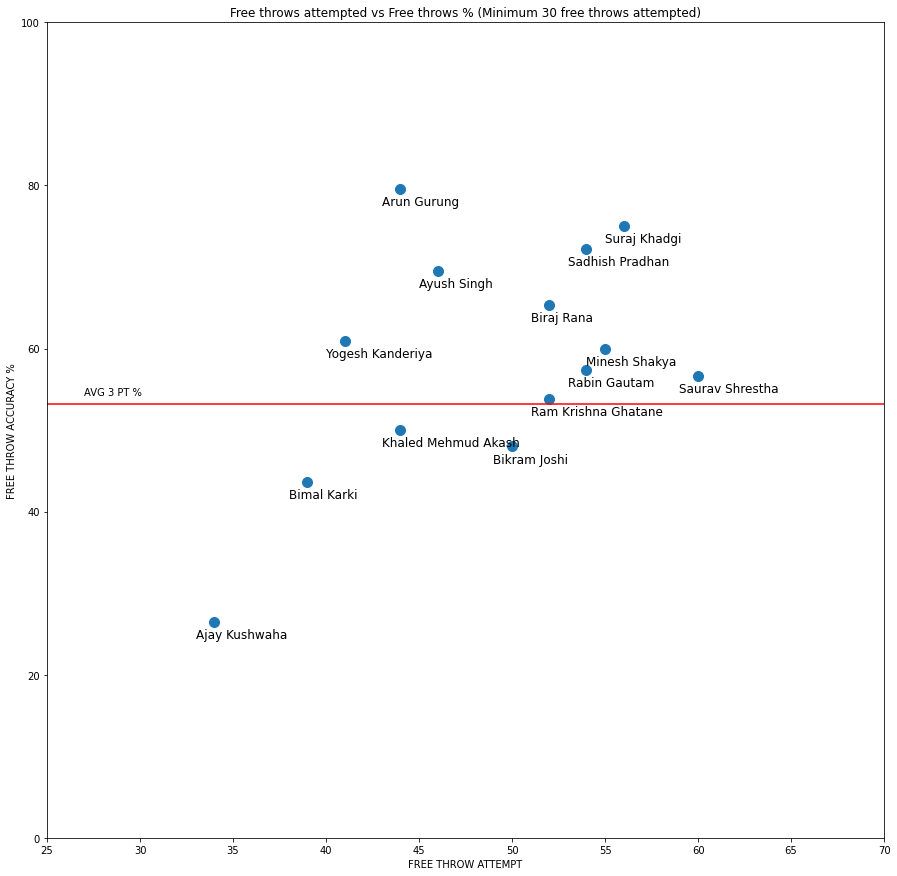

In [23]:
free_throws = pd.concat([df['FREE THROW ATTEMPT'], df['FREE THROW ACCURACY %'].astype(float), df['PLAYER NAME']], axis=1)
free_throws = free_throws.loc[free_throws['FREE THROW ATTEMPT'] > 30]
ax = free_throws.plot.scatter(x='FREE THROW ATTEMPT', y='FREE THROW ACCURACY %', ylim=(0,100), xlim=(25, 70), figsize=(15, 15), s=100)

for i, point in free_throws.iterrows():
        ax.text(point['FREE THROW ATTEMPT'] - 1, point['FREE THROW ACCURACY %'] - 2, str(point['PLAYER NAME']), fontsize=12)


ax.axline((0, ft_stats['mean']), (100, ft_stats['mean']), c='r')
ax.text(27, ft_stats['mean'] + 1, 'AVG 3 PT %')
ax.set_title('Free throws attempted vs Free throws % (Minimum 30 free throws attempted)')

fig = ax.get_figure()

fig.savefig("../images/Free throws.jpg")

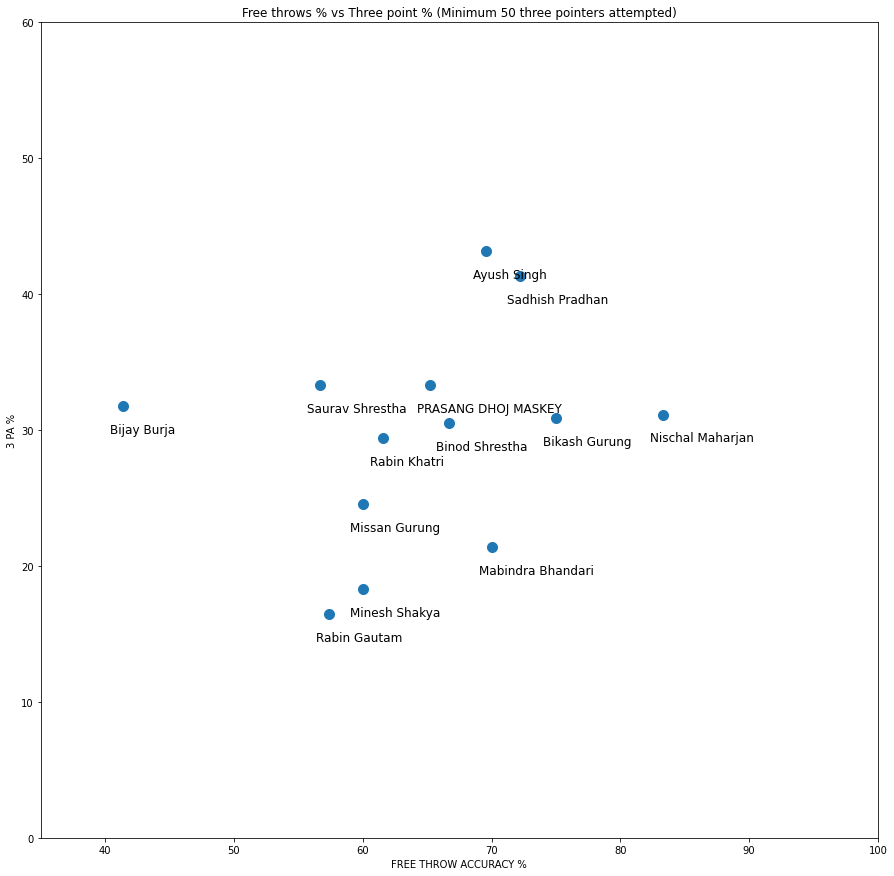

In [24]:
free_throws_vs_three_pt = pd.concat([df['3 PA %'].astype(float), df['3 POINTS ATTEMPT'], df['FREE THROW ACCURACY %'].astype(float), df['PLAYER NAME']], axis=1)
free_throws_vs_three_pt = free_throws_vs_three_pt.loc[free_throws_vs_three_pt['3 POINTS ATTEMPT'] > 50]
ax = free_throws_vs_three_pt.plot.scatter(x='FREE THROW ACCURACY %', y='3 PA %', ylim=(0,60), xlim=(35, 100), figsize=(15, 15), s=100)

for i, point in free_throws_vs_three_pt.iterrows():
        ax.text(point['FREE THROW ACCURACY %'] - 1, point['3 PA %'] - 2, str(point['PLAYER NAME']), fontsize=12)


ax.set_title('Free throws % vs Three point % (Minimum 50 three pointers attempted)')

fig = ax.get_figure()

fig.savefig("../images/Free throws vs three pointers.jpg")

In [25]:
two_point_stats = df['2 PA %'].astype(float).describe()

two_point_stats

count    111.000000
mean      42.701796
std       21.061829
min        0.000000
25%       33.333333
50%       45.454545
75%       51.649148
max      110.000000
Name: 2 PA %, dtype: float64

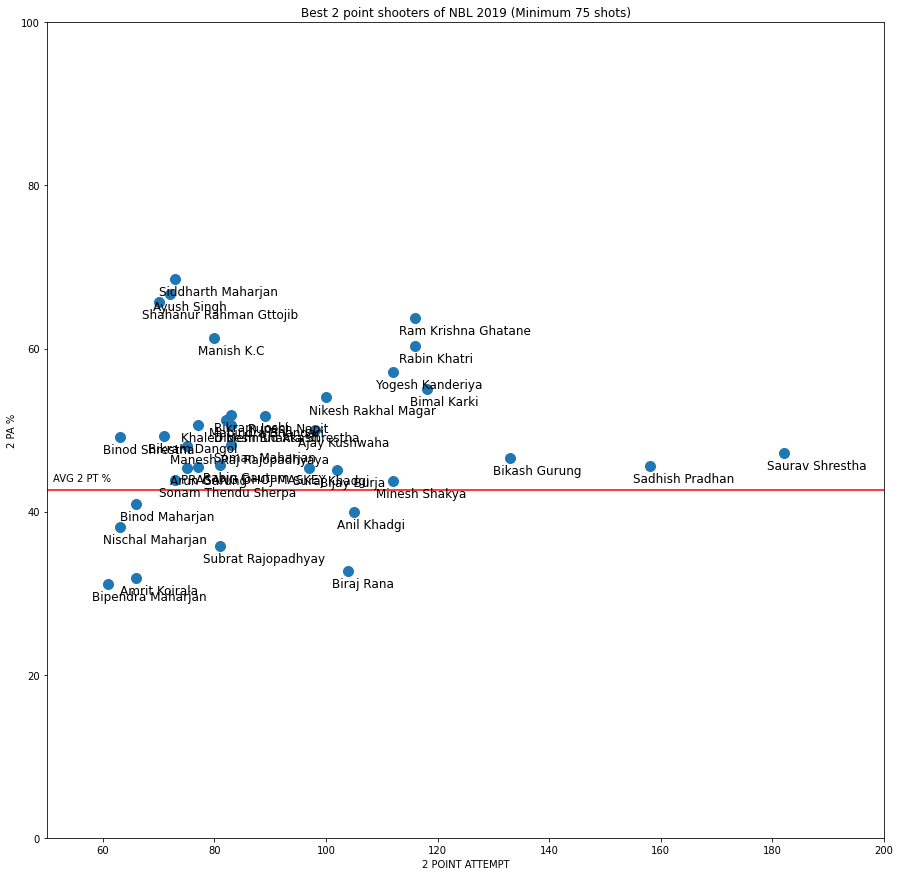

In [27]:
two_pt_shooting = pd.concat([df['2 PA %'].astype(float), df['2 POINT ATTEMPT'], df['PLAYER NAME']], axis=1)
two_pt_shooting = two_pt_shooting.loc[two_pt_shooting['2 POINT ATTEMPT'] > 60]
ax = two_pt_shooting.plot.scatter(x='2 POINT ATTEMPT', y='2 PA %', ylim=(0,100), xlim=(50,200), figsize=(15, 15), s=100)

for i, point in two_pt_shooting.iterrows():
        ax.text(point['2 POINT ATTEMPT'] - 3, point['2 PA %'] - 2, str(point['PLAYER NAME']), fontsize=12)


ax.axline((0, two_point_stats['mean']), (100, two_point_stats['mean']), c='r')
ax.text(51, two_point_stats['mean'] + 1, 'AVG 2 PT %')
ax.set_title('Best 2 point shooters of NBL 2019 (Minimum 75 shots)')

fig = ax.get_figure()

fig.savefig("../images/2 point shooting.jpg")